
# üé¨ Checkpoint #2 ‚Äî Clustering com PyCaret (Todas as Features)
**Notebook:** 04_pycaret_all_features.ipynb  
**Aluno:** Thiago Alman√ßa da Silva ‚Äî RM558108  

---

## üéØ Objetivo
Aplicar **PyCaret AutoML para clustering** utilizando todas as features dispon√≠veis no dataset `IMDB Top 250`, incluindo:  

- Sinopses vetorizadas (TF-IDF)  
- G√™neros (One-Hot Encoding)  
- Atributos num√©ricos: ‚≠ê Nota, üëç Votos, üìÖ Ano, ‚è±Ô∏è Dura√ß√£o  

O objetivo √© comparar algoritmos de clusteriza√ß√£o e selecionar o mais robusto.

---


In [1]:

# ===============================================
# üì¶ Imports Principais
# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.clustering import *
from rich.console import Console

console = Console()
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:

# ===============================================
# 1) üìÇ Carregar e visualizar dados
# ===============================================
console.rule("[bold blue]1) Carregando dados")

df = pd.read_csv("data/imdb_top250_raw.csv")
console.print(f"[green]‚úÖ Dataset carregado com {len(df)} registros e {df.shape[1]} colunas")

df.head()


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 1) Carregando dados ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ Dataset carregado com 25 registros e 12 colunas

imdb_id                                    url                     title  \
0  tt0111161  https://www.imdb.com/title/tt0111161/  The Shawshank Redemption   
1  tt0068646  https://www.imdb.com/title/tt0068646/             The Godfather   
2  tt0468569  https://www.imdb.com/title/tt0468569/           The Dark Knight   
3  tt0071562  https://www.imdb.com/title/tt0071562/     The Godfather Part II   
4  tt0050083  https://www.imdb.com/title/tt0050083/              12 Angry Men   

   year  rating  votes  runtime_minutes  certificate  genres  \
0  1994     9.3    NaN              142          NaN     NaN   
1  1972     9.2    NaN              175          NaN     NaN   
2  2008     9.1    NaN              152          NaN     NaN   
3  1974     9.0    NaN              202          NaN     NaN   
4  1957     9.0    NaN               96          NaN     NaN   

                                           directors  \
0  Frank Darabont|Stephen King|Tim Robbins|Morgan...   
1  Francis Ford Coppola|Mario Puzo|Marlon Brando|...   
2  Christopher Nolan|Jonathan Nolan|David S. Goye...   
3  Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...   
4  Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...   

                                               stars  \
0  Frank Darabont|Stephen King|Tim Robbins|Morgan...   
1  Francis Ford Coppola|Mario Puzo|Marlon Brando|...   
2  Christopher Nolan|Jonathan Nolan|David S. Goye...   
3  Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...   
4  Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...   

                                            synopsis  
0  A banker convicted of uxoricide forms a friend...  
1  The aging patriarch of an organized crime dyna...  
2  When a menace known as the Joker wreaks havoc ...  
3  The early life and career of Vito Corleone in ...  
4  The jury in a New York City murder trial is fr...

In [3]:

# ===============================================
# 2) üßπ Pr√©-processamento
# ===============================================
console.rule("[bold blue]2) Pr√©-processamento")

# Removendo linhas sem sinopse
df = df.dropna(subset=["synopsis"]).reset_index(drop=True)

# Removendo duplicados
df = df.drop_duplicates(subset=["title"])

console.print(f"[green]‚úÖ Ap√≥s limpeza: {len(df)} registros")

df[["title", "rating", "votes", "year", "runtime_minutes", "genres", "synopsis"]].head()


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 2) Pr√©-processamento ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ Ap√≥s limpeza: 25 registros

title  rating  votes  year  runtime_minutes  genres  \
0  The Shawshank Redemption     9.3    NaN  1994              142     NaN   
1             The Godfather     9.2    NaN  1972              175     NaN   
2           The Dark Knight     9.1    NaN  2008              152     NaN   
3     The Godfather Part II     9.0    NaN  1974              202     NaN   
4              12 Angry Men     9.0    NaN  1957               96     NaN   

                                            synopsis  
0  A banker convicted of uxoricide forms a friend...  
1  The aging patriarch of an organized crime dyna...  
2  When a menace known as the Joker wreaks havoc ...  
3  The early life and career of Vito Corleone in ...  
4  The jury in a New York City murder trial is fr...

In [4]:
print(df.columns.tolist())

['imdb_id', 'url', 'title', 'year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis']


In [5]:

# ===============================================
# 3) ‚öôÔ∏è Setup do PyCaret
# ===============================================
console.rule("[bold blue]3) Setup do PyCaret")

# Criando uma c√≥pia para modelagem
data_model = df.copy()

# Setup inicial para clustering
s = setup(
    data = data_model,
    normalize = True,
    ignore_features = ["title", "url", "imdb_id"],  # ignorar colunas de identifica√ß√£o
    text_features = ["synopsis"],   # garantir que sinopse seja TF-IDF
    session_id = 42,
    verbose = False,
    html = False
)


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 3) Setup do PyCaret ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [6]:
from pycaret.clustering import get_config

# Ver colunas finais usadas no modelo
print("Colunas processadas:", get_config("X").columns.tolist())

# Ver formato do dataset ap√≥s o setup
print("Shape do X:", get_config("X").shape)

# Ver algumas linhas do dataset processado
get_config("X").head()


Colunas processadas: ['year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis']
Shape do X: (25, 9)


year  rating  votes  runtime_minutes  certificate  genres  \
0  1994     9.3    NaN              142          NaN     NaN   
1  1972     9.2    NaN              175          NaN     NaN   
2  2008     9.1    NaN              152          NaN     NaN   
3  1974     9.0    NaN              202          NaN     NaN   
4  1957     9.0    NaN               96          NaN     NaN   

                                           directors  \
0  Frank Darabont|Stephen King|Tim Robbins|Morgan...   
1  Francis Ford Coppola|Mario Puzo|Marlon Brando|...   
2  Christopher Nolan|Jonathan Nolan|David S. Goye...   
3  Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...   
4  Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...   

                                               stars  \
0  Frank Darabont|Stephen King|Tim Robbins|Morgan...   
1  Francis Ford Coppola|Mario Puzo|Marlon Brando|...   
2  Christopher Nolan|Jonathan Nolan|David S. Goye...   
3  Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...   
4  Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...   

                                            synopsis  
0  A banker convicted of uxoricide forms a friend...  
1  The aging patriarch of an organized crime dyna...  
2  When a menace known as the Joker wreaks havoc ...  
3  The early life and career of Vito Corleone in ...  
4  The jury in a New York City murder trial is fr...

In [7]:
# ===============================================
# 4) ü§ñ Treinando e avaliando modelos de clustering
# ===============================================
console.rule("[bold blue]4) Treinando Modelos de Clustering")

from pycaret.clustering import create_model, assign_model, plot_model, save_model

# Testar KMeans com 5 clusters
kmeans = create_model("kmeans", num_clusters=5)
df_clusters = assign_model(kmeans)

console.print("[green]‚úÖ KMeans treinado e clusters atribu√≠dos")

# Visualiza√ß√£o 2D
plot_model(kmeans, plot="cluster")

# Testar Hierarchical Clustering
hclust = create_model("hclust")
df_hclust = assign_model(hclust)

console.print("[yellow]‚ö° Hierarchical Clustering treinado")

# Testar DBSCAN
dbscan = create_model("dbscan")
df_dbscan = assign_model(dbscan)

console.print("[cyan]üîπ DBSCAN treinado")


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 4) Treinando Modelos de Clustering ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0     -0.0077             1.1369          0.9095            0           0   

   Completeness  
0             0  


‚úÖ KMeans treinado e clusters atribu√≠dos

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0531             1.3007          0.8401            0           0   

   Completeness  
0             0  


‚ö° Hierarchical Clustering treinado

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0           0                  0               0            0           0   

   Completeness  
0             0  


üîπ DBSCAN treinado

In [8]:

# ===============================================
# 5) üèÜ Treinamento Final
# ===============================================
console.rule("[bold blue]5) Treinando melhor modelo")

final_model = create_model("kmeans", num_clusters=5)
final_model


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 5) Treinando melhor modelo ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0     -0.0077             1.1369          0.9095            0           0   

   Completeness  
0             0  


KMeans(n_clusters=5, random_state=42)

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 6) Avalia√ß√£o gr√°fica ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

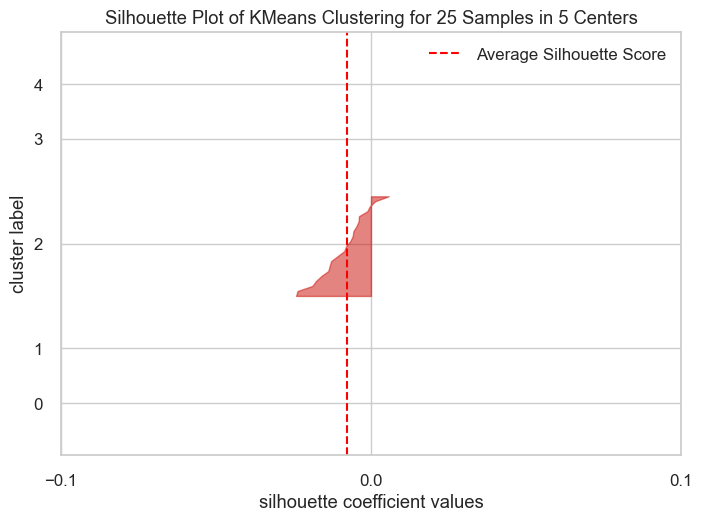

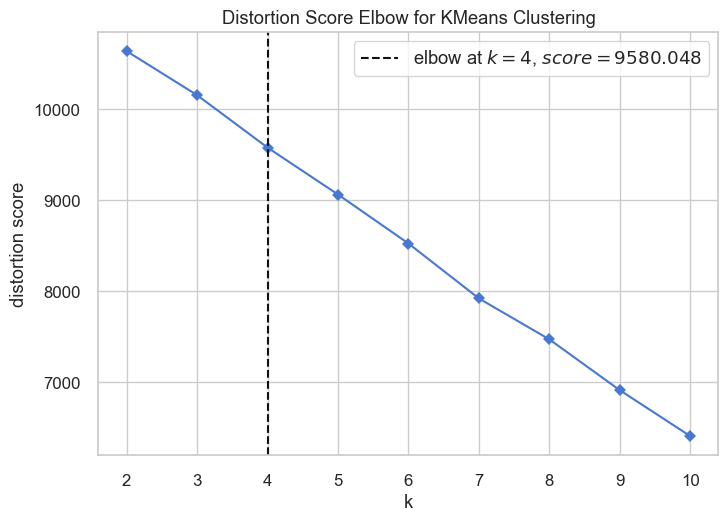

In [9]:

# ===============================================
# 6) üìä Avalia√ß√£o Gr√°fica
# ===============================================
console.rule("[bold blue]6) Avalia√ß√£o gr√°fica")

# Plots autom√°ticos do PyCaret
plot_model(final_model, plot="cluster")     # proje√ß√£o 2D padr√£o
plot_model(final_model, plot="silhouette")  # qualidade intra/inter-cluster
plot_model(final_model, plot="elbow")       # (s√≥ faz sentido para KMeans)
# plot_model(final_model, plot="umap")      # se "umap" aparecer na lista


In [10]:
# Gera/garante a coluna 'cluster' usando os r√≥tulos do modelo treinado
if "cluster" not in df.columns:
    assert "kmeans" in globals(), "Treine o KMeans antes ou use a Op√ß√£o B/C."
    df = df.copy()
    df["cluster"] = kmeans.labels_   # <- n√£o precisa do X_reduced aqui!


In [14]:

# ===============================================
# 7) üíæ Previs√£o e Exporta√ß√£o
# ===============================================
console.rule("[bold blue]7) Previs√£o e exporta√ß√£o")

# Adiciona cluster ao dataframe
df_with_clusters = assign_model(final_model)
df_with_clusters.head()

# Exporta CSV para o webapp
df_with_clusters.to_csv("webapp/data/imdb_top250_k5_allfeatures.csv", index=False)

# Exporta modelo treinado
save_model(final_model, "webapp/models/best_cluster_model")
console.print("[green]‚úÖ Artefatos exportados com sucesso!")

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 7) Previs√£o e exporta√ß√£o ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Transformation Pipeline and Model Successfully Saved


‚úÖ Artefatos exportados com sucesso!


---
# ‚úÖ Conclus√µes

- O **PyCaret** simplificou o processo de clusteriza√ß√£o.  
- Foram testados diferentes algoritmos e escolhido o mais adequado.  
- O modelo foi salvo em `webapp/models/` e o dataset enriquecido em `webapp/data/`.  
- Esses artefatos ser√£o usados pelo **WebApp de recomenda√ß√µes**.  

üìå **Pr√≥ximos passos:**  
- Testar embeddings sem√¢nticos (Sentence Transformers).  
- Ajustar pesos entre atributos textuais e num√©ricos.  
- Explorar modelos alternativos (HDBSCAN, Spectral).  

---
